<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/data_characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import json
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
def text_lenght(text):

    if text == None:

        return 0
    else:

        return len(text)

In [25]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv')
df['payload']         = df['payload'].apply(json.loads)
df['merged']          = df['payload'].apply(lambda x: x.get('pull_request').get('merged'))
df['comments']        = df['payload'].apply(lambda x: x.get('pull_request').get('comments'))
df['review_comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('review_comments'))
df['title lenght']    = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df['body lenght']     = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,True,0,0,12,83
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,False,0,0,12,83
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16,True,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39,True,0,0,75,155
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,True,0,1,65,114
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,False,0,0,65,0
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1,True,0,0,52,1092


In [26]:
df1 = pd.read_csv('/content/drive/MyDrive/Socialz/pascal_pullrequests.csv')
df1['payload']       = df1['payload'].apply(json.loads)
df1['title lenght'] = df1['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df1['body lenght']  = df1['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
df1

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,User756675678,User756675678/HeidiSQL,2021-02-04 13:04:34 UTC,"{'action': 'opened', 'number': 10, 'pull_reque...","""Pascal""","""opened""","""User756675678""","""User""","""https://api.github.com/repos/User756675678/He...",2,27,10,2,False,0,0,13,0
1,PullRequestEvent,hkollmann,TurboPack/Orpheus,2021-12-03 13:35:09 UTC,"{'action': 'opened', 'number': 30, 'pull_reque...","""Pascal""","""opened""","""hkollmann""","""User""","""https://api.github.com/repos/TurboPack/Orpheu...",4,213,67,9,False,0,0,45,155
2,PullRequestEvent,tebe6502,tebe6502/Mad-Pascal,2021-02-09 15:29:29 UTC,"{'action': 'closed', 'number': 19, 'pull_reque...","""Pascal""","""closed""","""zbyti""","""User""","""https://api.github.com/repos/tebe6502/Mad-Pas...",1,2,2,1,True,0,0,10,232
3,PullRequestEvent,hdxrie,royqh1979/Dev-CPP,2021-02-26 02:51:21 UTC,"{'action': 'opened', 'number': 154, 'pull_requ...","""Pascal""","""opened""","""hdxrie""","""User""","""https://api.github.com/repos/royqh1979/Dev-CP...",1,0,0,92,False,0,0,20,48
4,PullRequestEvent,rpottsoh,exercism/delphi,2021-10-04 16:36:15 UTC,"{'action': 'closed', 'number': 471, 'pull_requ...","""Pascal""","""closed""","""exercism-bot""","""User""","""https://api.github.com/repos/exercism/delphi/...",1,5,0,1,True,0,0,38,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16442,PullRequestEvent,salvadorbs,salvadorbs/Asuite,2021-08-07 16:09:38 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""Pascal""","""closed""","""transifex-integration[bot]""","""Bot""","""https://api.github.com/repos/salvadorbs/Asuit...",1,83,15,1,True,0,0,44,326
16443,PullRequestEvent,pyscripter,pyscripter/pyscripter,2021-01-19 15:09:17 UTC,"{'action': 'closed', 'number': 1054, 'pull_req...","""Pascal""","""closed""","""transifex-integration[bot]""","""Bot""","""https://api.github.com/repos/pyscripter/pyscr...",1,5,1,1,True,0,0,55,535
16444,PullRequestEvent,pyscripter,pyscripter/pyscripter,2021-01-19 15:10:00 UTC,"{'action': 'closed', 'number': 1057, 'pull_req...","""Pascal""","""closed""","""transifex-integration[bot]""","""Bot""","""https://api.github.com/repos/pyscripter/pyscr...",1,88,0,1,False,1,0,58,541
16445,PullRequestEvent,transifex-integration[bot],pyscripter/pyscripter,2021-01-19 15:24:59 UTC,"{'action': 'opened', 'number': 1083, 'pull_req...","""Pascal""","""opened""","""transifex-integration[bot]""","""Bot""","""https://api.github.com/repos/pyscripter/pyscr...",1,0,0,0,False,0,0,58,541


In [27]:
df2 = pd.read_csv('/content/drive/MyDrive/Socialz/fortran_pullrequests.csv')
df2['payload']      = df2['payload'].apply(json.loads)
df2['title lenght'] = df2['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df2['body lenght']  = df2['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
df2

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght
0,PullRequestEvent,rpeacoc,firemodels/cfast,2021-02-26 20:01:30 UTC,"{'action': 'closed', 'number': 1790, 'pull_req...","""Fortran""","""closed""","""rpeacoc""","""User""","""https://api.github.com/repos/firemodels/cfast...",1,3,1,1,True,0,0,57,0
1,PullRequestEvent,jedwards4b,ihesp/cime,2021-04-14 14:04:33 UTC,"{'action': 'closed', 'number': 1, 'pull_reques...","""Fortran""","""closed""","""jedwards4b""","""User""","""https://api.github.com/repos/ihesp/cime/pulls/1""",1,32,16,3,True,0,0,13,252
2,PullRequestEvent,kazulagi,kazulagi/plantFEM,2021-05-02 02:24:04 UTC,"{'action': 'opened', 'number': 164, 'pull_requ...","""Fortran""","""opened""","""kazulagi""","""User""","""https://api.github.com/repos/kazulagi/plantFE...",1,987,4,7,False,0,0,14,14
3,PullRequestEvent,GeorgeGayno-NOAA,NOAA-EMC/UFS_UTILS,2021-05-03 18:18:47 UTC,"{'action': 'opened', 'number': 493, 'pull_requ...","""Fortran""","""opened""","""GeorgeGayno-NOAA""","""User""","""https://api.github.com/repos/NOAA-EMC/UFS_UTI...",7,43,3,3,False,0,0,45,84
4,PullRequestEvent,jm-c,MITgcm/MITgcm,2021-06-08 16:01:04 UTC,"{'action': 'closed', 'number': 346, 'pull_requ...","""Fortran""","""closed""","""mjlosch""","""User""","""https://api.github.com/repos/MITgcm/MITgcm/pu...",33,2233,1773,7,True,11,2,36,1623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34379,PullRequestEvent,pull[bot],MRE-Code-Hub/WW3,2021-08-21 00:32:28 UTC,"{'action': 'closed', 'number': 41, 'pull_reque...","""Fortran""","""closed""","""pull[bot]""","""Bot""","""https://api.github.com/repos/MRE-Code-Hub/WW3...",1,24,3550,26,True,0,0,36,359
34380,PullRequestEvent,awvwgk,fortran-lang/fpm,2021-09-08 10:56:05 UTC,"{'action': 'closed', 'number': 557, 'pull_requ...","""Fortran""","""closed""","""awvwgk""","""User""","""https://api.github.com/repos/fortran-lang/fpm...",1,2,1,1,True,3,0,51,12
34381,PullRequestEvent,syamada0,SALMON-TDDFT/SALMON2,2021-11-18 02:16:07 UTC,"{'action': 'closed', 'number': 1068, 'pull_req...","""Fortran""","""closed""","""syamada0""","""User""","""https://api.github.com/repos/SALMON-TDDFT/SAL...",1,184,125,5,True,0,0,70,88
34382,PullRequestEvent,sbryngelson,MFlowCode/MFC-develop,2021-12-08 02:11:26 UTC,"{'action': 'closed', 'number': 44, 'pull_reque...","""Fortran""","""closed""","""henryleberre""","""User""","""https://api.github.com/repos/MFlowCode/MFC-de...",2,79,34,7,True,0,3,27,0


In [28]:
df = pd.concat([df,df1,df2], ignore_index=True)
del df1, df2
users = df['login'].unique()

In [29]:
columns = ['merged', 'commits', 'additions', 'deletions','changed_files', 'comments', 'review_comments','title lenght', 'body lenght']

def outlier_detection(df, user):
  
  # get train / test data by user
  X_train = df[(df['merged'] == True) & (df['login'] == user)]
  X_train = X_train[columns]

  X_test = df[(df['merged'] == False) & (df['login'] == user)]
  X_test = X_test[columns]

  # fit predict isolation forest algorithm for outlier detection
  if len(X_train) > 0 and len(X_test) > 0:
    clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

  # Concatenate train / test data with outlier predictions
    anomaly = np.concatenate([y_pred_train,y_pred_test])
    data = pd.concat([X_train, X_test])
    data['Anomaly'] = anomaly

  if len(X_train) > 0 and len(X_test) == 0:
    if len(X_train) == 1:
      data = X_train
      data['Anomaly'] = 1
    else:
      clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
      clf.fit(X_train)
      anomaly = clf.predict(X_train)
      data = X_train
      data['Anomaly'] = anomaly

  if len(X_train) == 0 and len(X_test) > 0:
    if len(X_test) == 1:
      data = X_test
      data['Anomaly'] = 1
    else:
      clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
      clf.fit(X_test)
      anomaly = clf.predict(X_test)
      data = X_test
      data['Anomaly'] = anomaly

  return data['Anomaly']

In [30]:
anomaly = pd.Series()

for user in users:
  anomaly = pd.concat([anomaly, outlier_detection(df, user)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [31]:
#TODO: add abnormal ratio, add average monthly activity -> add date/time data, user type, calculate centrality degree

anomaly

2        1
0        1
1        1
3        1
4        1
        ..
51960    1
51986    1
52035    1
52058    1
52154    1
Length: 52164, dtype: int64

In [32]:
dc = pd.concat([df['login'], pd.get_dummies(anomaly)], axis=1)
dc = dc.groupby(by='login', as_index=False).sum()
dc['anomaly_ratio'] = dc[-1] / (dc[-1] + dc[1])
dc

,login,-1,1,anomaly_ratio
0,0xflotus,0.0,1.0,0.000000
1,113Bom,0.0,2.0,0.000000
2,1480c1,0.0,1.0,0.000000
3,14N16O,0.0,3.0,0.000000
4,14NGiestas,0.0,3.0,0.000000
...,...,...,...,...
4113,zotti998,0.0,1.0,0.000000
4114,zoziha,19.0,83.0,0.186275
4115,zrick,0.0,17.0,0.000000
4116,zrxdaly,0.0,1.0,0.000000


In [33]:
# Build graph to calculate degree of centrality:

df['login'] = df['login'].apply(lambda x: 'User: '+x)
df['name'] = df['name'].apply(lambda x: 'Repo: '+x)

# Build the adjacency matrix
am = pd.crosstab(df['login'], df['name']).astype(float)
idx = am.columns.union(am.index)
am = am.reindex(index = idx, columns=idx, fill_value=0.0)

matrix_elements = np.sort(df['login'].unique(), axis=0)
repo_len = len(df['name'].unique())

def  cosine_similarity(vector_a, vector_b):
    
    norma = (np.linalg.norm(vector_a)*np.linalg.norm(vector_b))

    if norma > 0:

        cos_sim = np.dot(vector_a,vector_b)/ norma

    else:

        cos_sim = 0

    return cos_sim

#Initialise an auxiliar matrix to record the user - user similarities
shape = (len(matrix_elements), len(matrix_elements))
aux_matrix = pd.DataFrame((np.zeros(shape=shape)), columns=matrix_elements, index=matrix_elements)

for i in matrix_elements:
    for j in matrix_elements:

        # Compare row vectors
        aux_vector_a = am.loc[i].to_numpy()[:repo_len]
        aux_vector_b = am.loc[j].to_numpy()[:repo_len]
        
        score = cosine_similarity(aux_vector_a, aux_vector_b)
        # print(i, j, score)
        aux_matrix.at[i, j] = score

#%%
# Fill adj_matrix with aux_matrix data
for column in aux_matrix.columns:
    for row in aux_matrix.index:

        aux = aux_matrix.at[row, column]
        am.at[row, column] = aux
        # if (aux == am.at[row, column]) ==  False:
        #     print(aux, row, column)

# %%
# Build graph from matrix, after user-user connections
G = nx.from_pandas_adjacency(am)

In [34]:
def CreateBarChartForCentralityMeasures(data, centrality_name):
    df = pd.DataFrame(data, columns=['Node', centrality_name])
    return df

degree_centrality_df = CreateBarChartForCentralityMeasures(sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True), 'Degree Centrality')

In [35]:
degree_centrality_df
degree_centrality_df['Node'] = degree_centrality_df['Node'].apply(lambda x: x.replace('User: ', ''))
degree_centrality_df = degree_centrality_df.rename(columns={'Node' : 'login'})

In [36]:
degree_centrality_df

,login,Degree Centrality
0,dependabot[bot],0.044489
1,atkins126,0.031855
2,climbfuji,0.017876
3,pull[bot],0.017876
4,sbrus89,0.017742
...,...,...
7436,Repo: zoziha/SPH,0.000134
7437,Repo: zoziha/dp-stdlib,0.000134
7438,Repo: zoziha/mini-test,0.000134
7439,Repo: zu1kbackup/cheat-engine,0.000134


In [37]:
dc = pd.merge(degree_centrality_df, dc, on ='login', how ='inner')
dc

,login,Degree Centrality,-1,1,anomaly_ratio
0,dependabot[bot],0.044489,87.0,539.0,0.138978
1,atkins126,0.031855,66.0,984.0,0.062857
2,climbfuji,0.017876,62.0,377.0,0.141230
3,pull[bot],0.017876,756.0,6404.0,0.105587
4,sbrus89,0.017742,1.0,15.0,0.062500
...,...,...,...,...,...
4113,zero5556,0.000403,0.0,2.0,0.000000
4114,zharovdv,0.000403,0.0,1.0,0.000000
4115,zhuhua123,0.000403,0.0,1.0,0.000000
4116,ziu1986,0.000403,0.0,1.0,0.000000


In [38]:
df['login'] = df['login'].apply(lambda x: x.replace('User: ',''))
aux = df.groupby('login').size()/12
aux = aux.to_frame().reset_index()
aux = aux.rename(columns= {0: 'avg_monthly_act'})
aux

,login,avg_monthly_act
0,0xflotus,0.083333
1,113Bom,0.166667
2,1480c1,0.083333
3,14N16O,0.250000
4,14NGiestas,0.250000
...,...,...
4113,zotti998,0.083333
4114,zoziha,8.500000
4115,zrick,1.416667
4116,zrxdaly,0.083333


In [39]:
dc = pd.merge(dc, aux, on ='login', how ='inner')
dc

,login,Degree Centrality,-1,1,anomaly_ratio,avg_monthly_act
0,dependabot[bot],0.044489,87.0,539.0,0.138978,52.166667
1,atkins126,0.031855,66.0,984.0,0.062857,87.500000
2,climbfuji,0.017876,62.0,377.0,0.141230,36.583333
3,pull[bot],0.017876,756.0,6404.0,0.105587,596.666667
4,sbrus89,0.017742,1.0,15.0,0.062500,1.333333
...,...,...,...,...,...,...
4113,zero5556,0.000403,0.0,2.0,0.000000,0.166667
4114,zharovdv,0.000403,0.0,1.0,0.000000,0.083333
4115,zhuhua123,0.000403,0.0,1.0,0.000000,0.083333
4116,ziu1986,0.000403,0.0,1.0,0.000000,0.083333


In [40]:
aux = pd.concat([df['login'], pd.get_dummies(df['user_type'])], axis=1)
aux = aux.groupby(['login'], axis=0, as_index=False).sum()
aux['"Bot"'] = aux['"Bot"'].apply(lambda x: 0 if x == 0 else x/x)
aux['"User"'] = aux['"User"'].apply(lambda x: 0 if x == 0 else x/x)

In [41]:
dc = pd.merge(dc, aux, on ='login', how ='inner')
dc

,login,Degree Centrality,-1,1,anomaly_ratio,avg_monthly_act,"""Bot""","""Organization""","""User"""
0,dependabot[bot],0.044489,87.0,539.0,0.138978,52.166667,1.0,0.0,0.0
1,atkins126,0.031855,66.0,984.0,0.062857,87.500000,0.0,0.0,1.0
2,climbfuji,0.017876,62.0,377.0,0.141230,36.583333,0.0,0.0,1.0
3,pull[bot],0.017876,756.0,6404.0,0.105587,596.666667,1.0,0.0,0.0
4,sbrus89,0.017742,1.0,15.0,0.062500,1.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4113,zero5556,0.000403,0.0,2.0,0.000000,0.166667,0.0,0.0,1.0
4114,zharovdv,0.000403,0.0,1.0,0.000000,0.083333,0.0,0.0,1.0
4115,zhuhua123,0.000403,0.0,1.0,0.000000,0.083333,0.0,0.0,1.0
4116,ziu1986,0.000403,0.0,1.0,0.000000,0.083333,0.0,0.0,1.0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


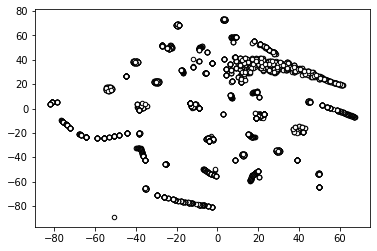

In [43]:
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(dc[['Degree Centrality',-1,1,'anomaly_ratio','avg_monthly_act','"Bot"','"User"']])
X = projections[:,0]
y = projections[:,1]
plt.scatter(X, y , c="white", s=20, edgecolor="k")